<H3>Learning acknowledgement </H3> <p>https://www.kaggle.com/imdevskp/covid-19-analysis-viz-prediction-comparisons <br></p>
Its a very basic data visualization done during the process of learning Pandas and Data Science. I hope to improve over time! 

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objs as go
import plotly.figure_factory as ff

from IPython.display import Javascript
from IPython.core.display import display
from IPython.core.display import HTML

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/corona-virus-report/covid_19_clean_complete.csv
/kaggle/input/corona-virus-report/complete_data_new_format.csv


<H2> Reading the dataset </H2>

In [2]:
dataset = pd.read_csv("/kaggle/input/corona-virus-report/covid_19_clean_complete.csv", parse_dates=['Date'])
dataset = dataset.drop(['Lat', 'Long'], axis=1)
dataset.replace(np.nan, "NA", inplace=True)

<H2> Adding additional coloumn for active state</H2>

In [3]:
dataset['Active'] = dataset['Confirmed'] - dataset['Deaths'] - dataset['Recovered']
dataset.tail(10)

,Province/State,Country/Region,Date,Confirmed,Deaths,Recovered,Active
16045,NA,Belize,2020-03-26,2,0,0,2
16046,NA,Laos,2020-03-26,6,0,0,6
16047,NA,Libya,2020-03-26,1,0,0,1
16048,NA,West Bank and Gaza,2020-03-26,84,1,17,66
16049,NA,Guinea-Bissau,2020-03-26,2,0,0,2
16050,NA,Mali,2020-03-26,4,0,0,4
16051,NA,Saint Kitts and Nevis,2020-03-26,2,0,0,2
16052,Northwest Territories,Canada,2020-03-26,1,0,0,1
16053,Yukon,Canada,2020-03-26,3,0,0,3
16054,NA,Kosovo,2020-03-26,71,1,0,70


<H2>Visualizing the crisis Country wise: Top 15 Countries </H2>

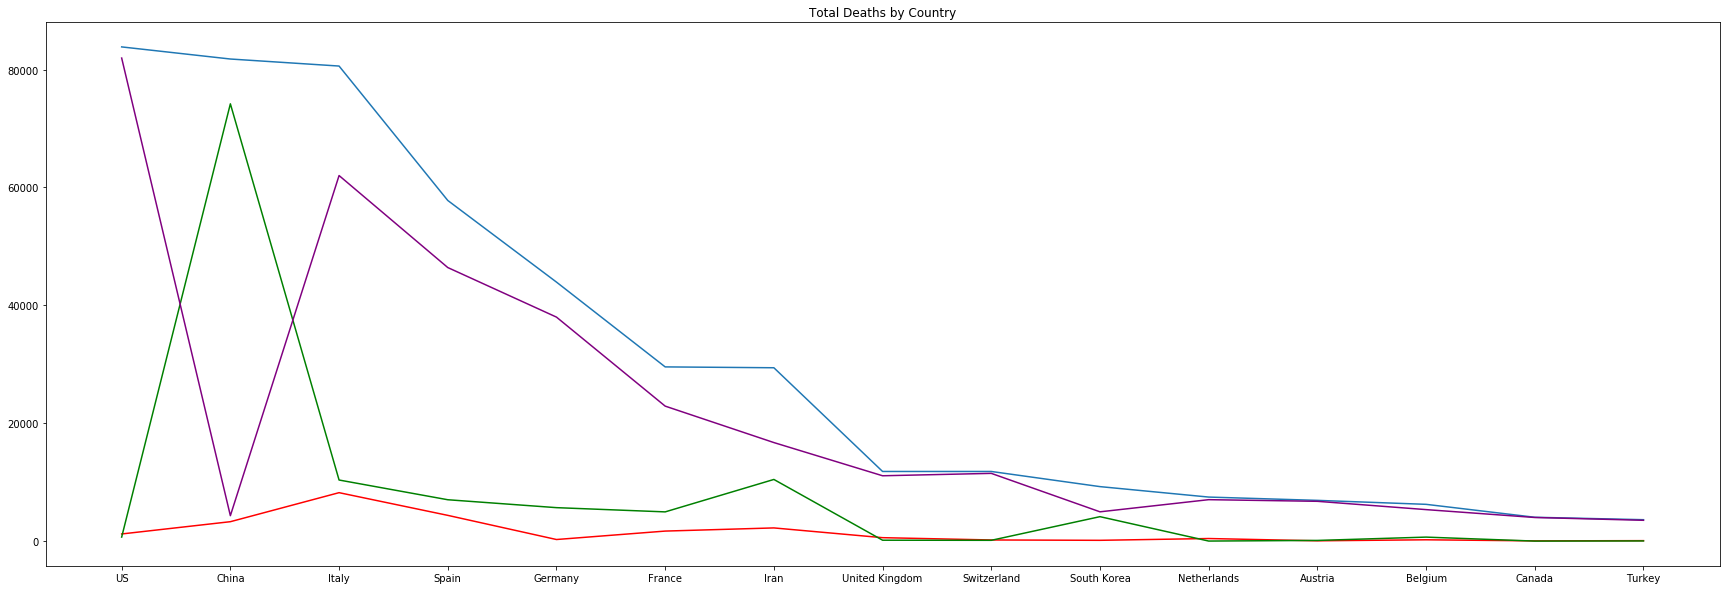

,Country/Region,Deaths,Confirmed,Recovered,Active
163,US,1209,83836,681,81946
33,China,3291,81782,74181,4310
81,Italy,8215,80589,10361,62013
148,Spain,4365,57786,7015,46406
62,Germany,267,43938,5673,37998
...,...,...,...,...,...
145,Somalia,0,2,0,2
124,Papua New Guinea,0,1,0,1
136,Saint Vincent and the Grenadines,0,1,0,1
94,Libya,0,1,0,1


In [4]:
full = dataset[dataset['Date'] == max(dataset['Date'])].reset_index()
grouped = full.groupby(["Country/Region"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
grouped = grouped.sort_values(by='Confirmed', ascending=False)
groupedTop15 =  grouped[:15]
plt.figure(figsize=(30, 10))
plt.plot(groupedTop15['Country/Region'], groupedTop15['Deaths'],color='red')
plt.plot(groupedTop15['Country/Region'], groupedTop15['Confirmed'])
plt.plot(groupedTop15['Country/Region'], groupedTop15['Recovered'], color='green')
plt.plot(groupedTop15['Country/Region'], groupedTop15['Active'], color='purple')

plt.title('Total Deaths by Country')
plt.show()

grouped

<H2>Vizualizing the crisis Country wise by different plotting tool: Top 15 Countries</H2>

In [5]:
temp = groupedTop15.melt(id_vars=['Country/Region'], value_vars=['Confirmed', 'Deaths', 'Recovered'], var_name='Case', value_name='Count')
fig = px.bar(temp, x='Country/Region', y='Count', barmode='group', color='Case', text="Count", height=500)
fig.show()

# lets see for US how many cases are reported till now
us = grouped[grouped['Country/Region']=='US']
print("Confirmed cases in US \n")
print(us, "\n")

# print the world cases
world = grouped.sum(axis=0).drop(['Country/Region'])
print("Confirmed cases in world")
print(world)

Confirmed cases in US 

    Country/Region  Deaths  Confirmed  Recovered  Active
163             US    1209      83836        681   81946 

Confirmed cases in world
Deaths        23970
Confirmed    529591
Recovered    121966
Active       383655
dtype: object


<H2> Grouping data on basis of Country, State and Date </H2>

In [6]:
grouped = dataset.groupby(["Country/Region", "Province/State", "Date"])["Deaths", "Confirmed", "Recovered", "Active"].sum().reset_index()
grouped = grouped[grouped['Date']==max(grouped['Date'])]
grouped = grouped.sort_values(by='Confirmed', ascending=False)
grouped = grouped.loc[grouped.sum(axis=1)>0]
grouped

,Country/Region,Province/State,Date,Deaths,Confirmed,Recovered,Active
14949,US,NA,2020-03-26,1209,83836,681,81946
9424,Italy,NA,2020-03-26,8215,80589,10361,62013
4354,China,Hubei,2020-03-26,3169,67801,61201,3431
13974,Spain,NA,2020-03-26,4365,57786,7015,46406
8189,Germany,NA,2020-03-26,267,43938,5673,37998
...,...,...,...,...,...,...,...
10269,Libya,NA,2020-03-26,0,1,0,1
14624,Timor-Leste,NA,2020-03-26,0,1,0,1
5394,China,Tibet,2020-03-26,0,1,1,0
13194,Saint Vincent and the Grenadines,NA,2020-03-26,0,1,0,1


<H2> Finding correlation between Confirmed, Deaths, Recovered</H2>

In [7]:
dataset.corr()

,Confirmed,Deaths,Recovered,Active
Confirmed,1.000000,0.898479,0.788051,0.863200
Deaths,0.898479,1.000000,0.703156,0.763774
Recovered,0.788051,0.703156,1.000000,0.370237
Active,0.863200,0.763774,0.370237,1.000000


<H2>Visualizing the current state in United States</H2>

In [8]:
us = dataset[dataset['Country/Region']=='US'].drop(['Country/Region'], axis=1)
us = us[us.sum(axis = 1) > 0]
us

,Province/State,Date,Confirmed,Deaths,Recovered,Active
225,NA,2020-01-22,1,0,0,1
472,NA,2020-01-23,1,0,0,1
719,NA,2020-01-24,2,0,0,2
966,NA,2020-01-25,2,0,0,2
1213,NA,2020-01-26,5,0,0,5
...,...,...,...,...,...,...
15045,NA,2020-03-22,33276,417,178,32681
15292,NA,2020-03-23,43847,557,178,43112
15539,NA,2020-03-24,53740,706,348,52686
15786,NA,2020-03-25,65778,942,361,64475


<H2> States with Covid-19 case confirmed</H2>

In [9]:
cases = us
cases = cases.groupby(['Province/State'])['Confirmed'].sum().reset_index()
fig = px.bar(cases, x='Province/State', y='Confirmed', title='State wise confirmed cases of COVID-19', text='Confirmed')
fig.show()
cases


,Province/State,Confirmed
0,NA,372968


<H2> States with Deaths reported till now and the number of it reported</H2>

In [10]:
cases = us
cases = cases.groupby(['Province/State'])['Deaths'].sum().reset_index()
fig = px.bar(cases, x='Province/State', y='Deaths', title='State wise deaths reported of COVID-19', text='Deaths')
fig.show()

<H2> States which have seen recovery </H2> 

In [11]:
cases = us
cases = cases.groupby(['Province/State'])['Recovered'].sum().reset_index()
fig = px.bar(cases, x='Province/State', y='Recovered', title='State wise recovered cases of COVID-19', text='Recovered')
fig.show()

<H2> State that have cases reported, but no deaths and recovery reported yet</H2>

In [12]:
cases = us[us['Confirmed']==us['Active']]
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases
fig = px.bar(cases, x='Province/State', y='Confirmed', text='Active', title='Total confirmed cases with no deaths or recovery reported till now in US')
fig.show()

<H2>States where all the confirmed cases died </H2>

In [13]:
cases = us[us['Confirmed']==us['Deaths']]
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases
fig = px.bar(cases, x='Province/State', y='Deaths', title='Total confirmed cases with all deaths and no recovery in US')
fig.show()

<H2>States where all the confirmed cases recovered </H2>

In [14]:
cases = us[us['Confirmed']==us['Recovered']]
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases
fig = px.bar(cases, x='Province/State', y='Confirmed', title='Total confirmed cases with no deaths and all recovered in US')
fig.show()

<H2> Combining the above graph in one </H2> 

In [15]:
cases = us
cases = cases.groupby(['Province/State'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases = pd.melt(cases, id_vars='Province/State', value_vars=['Confirmed', 'Deaths', 'Recovered', 'Active'], value_name='Count', var_name='Case')
fig = px.bar(cases, x='Province/State', y='Count', text='Count', barmode='group', color='Case', title='State wise status of COVID-19')
fig.show()

<H2> Visualizing the cases trend over time </H2>

In [16]:
cases = us
cases = cases.groupby(['Date'])['Confirmed', 'Deaths', 'Recovered', 'Active'].sum().reset_index()
cases = cases[cases.sum(axis=1)>0]

<H2> Confirmed cases trend</H2>

In [17]:
fig = px.line(cases, x='Date', y='Confirmed', text='Confirmed', title='Over time confirmed status of COVID-19')
fig.show()

<H2> Deaths trend</H2>

In [18]:
fig = px.line(cases, x='Date', y='Deaths', text='Deaths', title='Over time death status of COVID-19')
fig.show()

<H2> Recovery trend </H2>

In [19]:
fig = px.line(cases, x='Date', y='Recovered', text='Recovered', title='Over time recovery status of COVID-19')
fig.show()

<H2> Active status trend </H2>

In [20]:
fig = px.line(cases, x='Date', y='Active', text='Active', title='Over time active status of COVID-19')
fig.show()

In [21]:
min(us['Date'])


Timestamp('2020-01-22 00:00:00')